In [1]:
import numpy as np
import matplotlib.pyplot as plt

from zodipol.mie_scattering.particle_size_model import ParticleSizeModel
from zodipol.mie_scattering.mie_scattering_model import MieScatteringModel
from zodipol.visualization.mie_plotting import plot_mueller_matrix_elems, plot_intensity_polarization

In [2]:
spectrum = np.logspace(np.log10(300), np.log10(700), 20)  # white light wavelength in nm

psm = ParticleSizeModel(s_min=9.33360966e-02 , s_max=9.41424108e+00 , big_gamma=1,
                            small_gamma=2.55461407e+00)  # create a particle size model
refractive_index_dict = {3.07931946e+00  + 9.99760821e-02j: 1-2.08181589e-01 , 2.11869088e+00  + 2.78514058e-03j: 2.08181589e-01 }
mie = MieScatteringModel.train(spectrum, particle_size=psm, refractive_index_dict=refractive_index_dict)

In [3]:
# test the model
theta_test = np.linspace(0, np.pi, 100, endpoint=True)
SL, SR, SU, P = mie.get_scattering(spectrum, theta_test)
mie_scatt = mie(spectrum, theta_test)

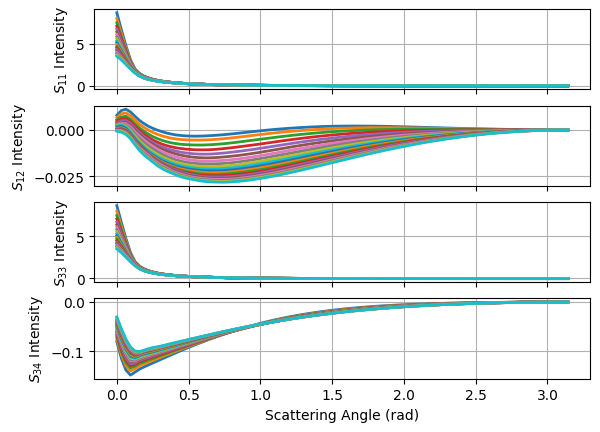

In [4]:
# plot the Mueller matrix elements
plot_mueller_matrix_elems(theta_test, mie_scatt[:, :, 0, 0], mie_scatt[:, :, 0, 1],
                          mie_scatt[:, :, 2, 2], mie_scatt[:, :, 2, 3])

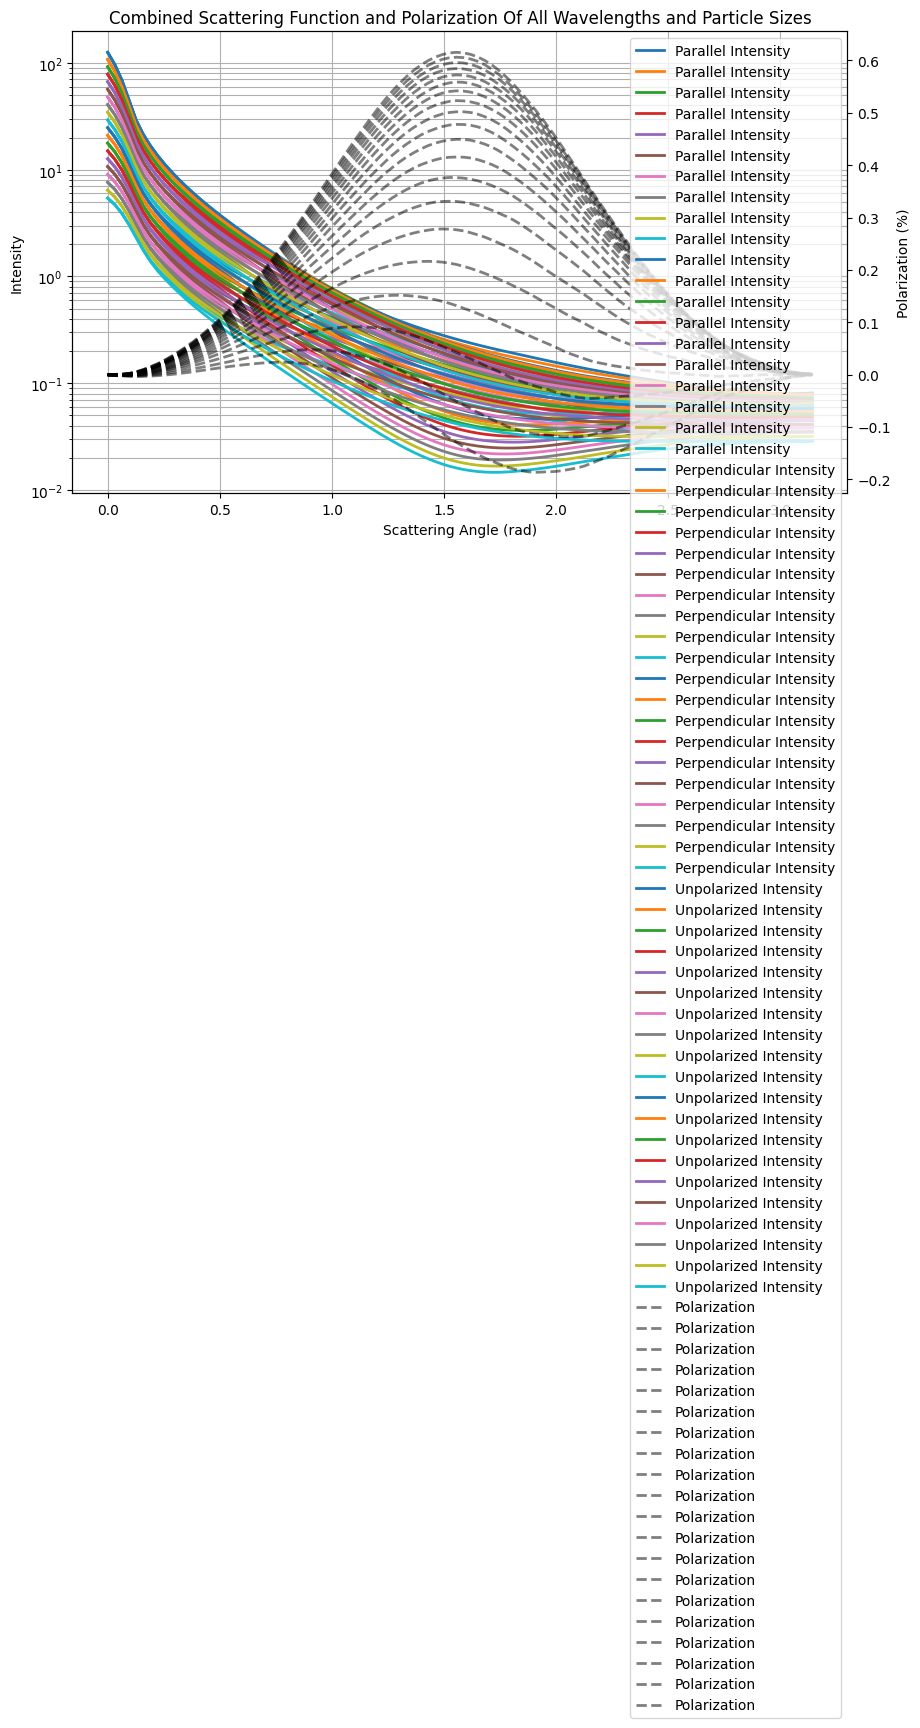

In [6]:
plot_intensity_polarization(theta_test, SL, SR, SU, P)

In [ ]:
mie.save('saved_models/white_light_mie_model')

## Plot Kelsall phase function model

In [3]:
from zodipy._source_funcs import get_phase_function

theta = np.linspace(0, np.pi, 100)
C1 = (-0.942, 0.121, -0.165)
C2 = (-0.527, 0.187, -0.598)
C3 = (-0.431, 0.172, -0.633)
phase_func1 = get_phase_function(theta, C1)
phase_func2 = get_phase_function(theta, C2)
phase_func3 = get_phase_function(theta, C3)

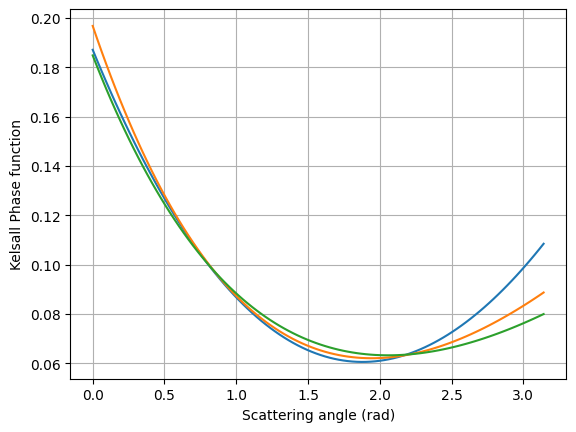

In [4]:
plt.figure()
plt.plot(theta, phase_func1, label='Kelsall Phase function for $\lambda=1.25\mu m$')
plt.plot(theta, phase_func2, label='Kelsall Phase function for $\lambda=1.25\mu m$')
plt.plot(theta, phase_func3, label='Kelsall Phase function for $\lambda=1.25\mu m$')
plt.grid()
plt.xlabel('Scattering angle (rad)')
plt.ylabel('Kelsall Phase function')
plt.show()

In [6]:
# show the normalization of the phase function
2 * np.pi * np.trapz(phase_func2 * np.sin(theta), theta)

0.9998494866476493

In [16]:
print(2 * np.pi * np.trapz(mie_scatt[:, :, 0, 0], theta_test, axis=0))

[6.92739283 6.65339347 6.39470519 6.14808301 5.91386376 5.69355679
 5.48823899 5.2992727  5.12740484 4.97184653 4.83076023 4.70155879
 4.5818431  4.4698762  4.36450794 4.26539062 4.17241241 4.08516156
 4.00335102 3.92697862]


(100,)